Recamán's sequence (or Recaman's sequence): $a(0) = 0;\ for\ n > 0,\ a(n) = a(n-1) - n$ if positive and not already in the sequence, otherwise $a(n) = a(n-1) + n$

$$ a(n) = a(n-1)-n $$
$$ a(n) = a(n - 1) + n$$

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import numba

In [2]:
@numba.jit
def recaman_np(n):
    sequence = np.zeros(n, dtype=int)
    idx = 0

    for i in range(1, n):
        idx -= i 
        if (idx > 0) and (idx not in sequence):
            sequence[i] = idx
        else:
            idx += i*2
            sequence[i] = idx
    return sequence

In [3]:
# implementation from the wild
def recaman(n):
 
    # Create an array to store terms
    arr = [0] * n
 
    # First term of the sequence
    # is always 0
    arr[0] = 0
 
    # Fill remaining terms using
    # recursive formula.
    for i in range(1, n):
     
        curr = arr[i-1] - i
        for j in range(0, i):
         
            # If arr[i-1] - i is
            # negative or already
            # exists.
            if ((arr[j] == curr) or curr < 0):
                curr = arr[i-1] + i
                break
             
        arr[i] = curr
    return arr

In [3]:
n = 100000

In [ ]:
%timeit recaman_np(n)

In [7]:
%timeit recaman(n)

1.81 s ± 8.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
seq_np = recaman_np(n)

In [5]:
seq = seq_np

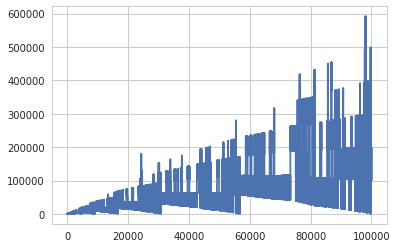

In [6]:
plt.plot(seq)

In [7]:
seq[:20]

array([ 0,  1,  3,  6,  2,  7, 13, 20, 12, 21, 11, 22, 10, 23,  9, 24,  8,
       25, 43, 62])

# Draw circles

+ fer radi tan gran com la diferència al següent element

In [96]:
import numpy.random as rnd
import numpy as np
from matplotlib import patches

def arc_patch(xy, width, height, theta1=0., theta2=180., resolution=50, **kwargs):
    """ creates semicercles. Function found on stackoverflow <-Thanks"""
    # generate the points
    theta = np.linspace(np.radians(theta1), np.radians(theta2), resolution)
    points = np.vstack((width*np.cos(theta)  + xy[0], 
                        height*np.sin(theta) + xy[1]))
    # build the polygon and add it to the axes
    poly = patches.Polygon(points.T, closed=True, **kwargs)

    return poly

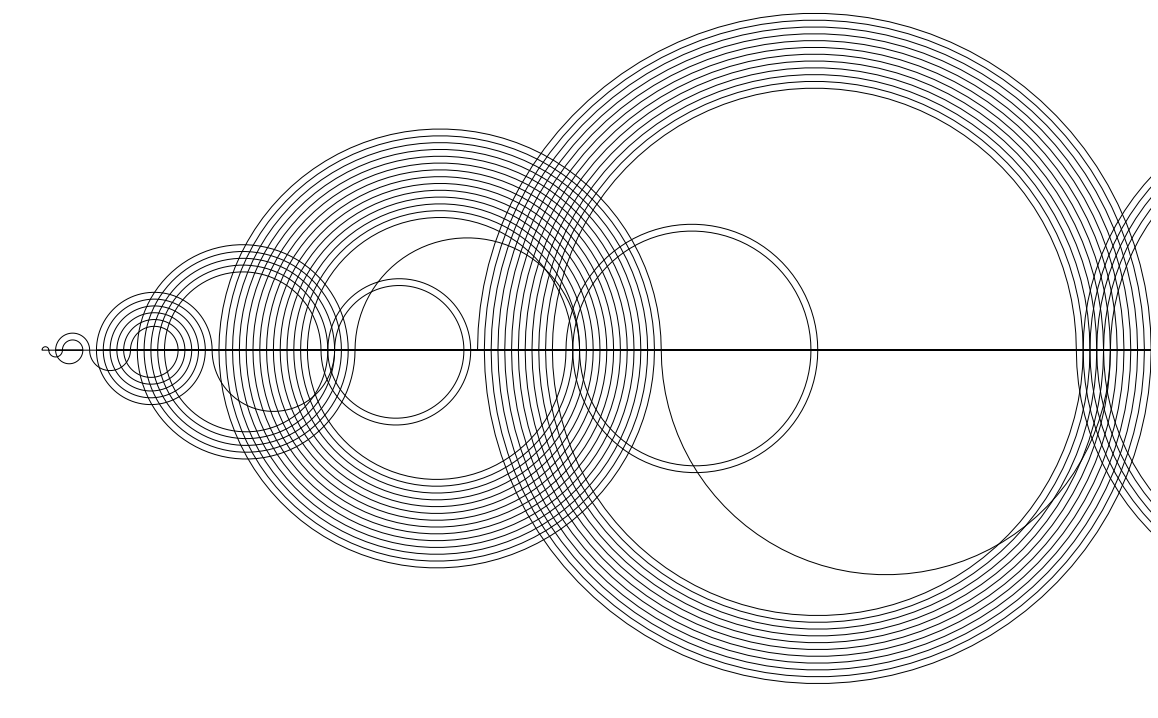

In [102]:
def ncycles(iterable, n):
    "Returns the sequence elements n times"
    return chain.from_iterable(repeat(iterable, n))

R = (0, 180)
n = 100

seq = recaman_np(n)
seq_tups = (sorted((a,b)) for a, b in zip(seq,seq[1:]))
arcs = []
# make arcs
for i, (x, r) in enumerate(zip(seq_tups, ncycles(R, n))):
    
    x0 = x[0]  # start x of semicircle
    radio = abs((x[1] - x[0])/2)
    center = x0 + radio # center of the circle
    a = arc_patch(xy=(center,0), width=radio, height=radio, theta1=r, theta2=r+180)
    arcs.append(a)
    
# Draw arcs
fig, ax = plt.subplots(1,1, figsize=(20,20), subplot_kw={'aspect':'equal'})
palette = sns.color_palette('viridis', n*2)
for c, a in enumerate(arcs):
    ax.add_artist(a)
#     a.set_clip_box(ax.bbox)
#     a.set_alpha(1)
    a.set_facecolor('none')
#     a.set_facecolor(palette[c])
    a.set_edgecolor('black')
    a.set_linewidth(1)

ax.set_xlim(-1, x[1])
ax.set_ylim(-radio-1, radio+1)
ax.axis('off')
plt.savefig('recamans.pdf', dpi=1200)
plt.savefig('recamans.png', dpi=600)
plt.show()